In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from pycaret.classification import *
from skopt.space import Real, Categorical, Integer
from time import time
from skopt import BayesSearchCV
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
import xgboost as xgb
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot_ng as pydot
from IPython.display import Image
import pydotplus

C:\Users\sakth\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(r'C:\Users\sakth\Desktop\dse\kaggle\diabetes\diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
cols = list(data.columns)
for i in cols:
    if (data[data[i]=='?']['encounter_id'].count()):
        print()
        print(i)
        print('null values in ', data[data[i]=='?']['encounter_id'].count())
        print('% of null values in ', data[data[i]=='?']['encounter_id'].count()/data['encounter_id'].count() * 100)


race
null values in  2273
% of null values in  2.2335554114340743


C:\Users\sakth\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)



weight
null values in  98569
% of null values in  96.85847925633315

payer_code
null values in  40256
% of null values in  39.5574160328597

medical_specialty
null values in  49949
% of null values in  49.08220820313268

diag_1
null values in  21
% of null values in  0.02063557573256294

diag_2
null values in  358
% of null values in  0.3517874339170253

diag_3
null values in  1423
% of null values in  1.398305917497003


In [6]:
data['age'] = data['age'].str[1:].str.split('-',expand=True)
data['gender'] = data['gender'].replace('Unknown/Invalid',np.nan)
df = data.drop(['weight','payer_code','medical_specialty'],axis=1) ## since this columns has more than 40% null values
df.replace('?',np.nan,inplace=True)

In [7]:
df['gender'] = df['gender'].map({'Female':0,'Male':1})

## since in Race 'Hispanic','Asian','Others' having very low values we are taking this 3 as others

df['race'] = df['race'].map({'Caucasian':1,'AfricanAmerican':2,'Hispanic':3,'Other':5,'Asian':4})

# here we are assuming  None means that patient not taken that test in all testing condition and drug

##norm means if patient having glu_serum below 125 means they are treating as norm level of glu_serum in there body
df['max_glu_serum'] = df['max_glu_serum'].map({'None':0,'>300':3,'>200':2,'Norm':1})

df['A1Cresult'] = df['A1Cresult'].map({'None':0,'>7':2,'>8':3,'Norm':1})

df = df.drop(['examide','citoglipton'],axis=1) ## we are droping this columns since it have only 'No' unique have in it

df['change'] = df['change'].map({'Ch':1,'No':0})

df['diabetesMed'] = df['diabetesMed'].map({'No':0,'Yes':1})

df['readmitted'] = df['readmitted'].map({'NO':0,'<30':1,'>30':1})

In [8]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace(to_replace ='^V',value = 1001,regex=True)
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].replace(to_replace ='^E',value = 1010,regex=True)

In [9]:
df[['diag_1','diag_2','diag_3']] = df[['diag_1','diag_2','diag_3']].astype(float)

In [10]:
def diag(data):
    if (data >= 1)&(data < 140):
        return 1
    elif (data >= 140)&(data < 240):
        return 2
    elif (data >= 240)&(data < 280):
        return 3
    elif (data >= 280)&(data < 290):
        return 4
    elif (data >= 290)&(data < 320):
        return 5
    elif (data >= 320)&(data < 390):
        return 6
    elif (data >= 390)&(data < 460):
        return 7
    elif (data >= 460)&(data < 520):
        return 8
    elif (data >= 520)&(data < 580):
        return 9
    elif (data >= 580)&(data < 630):
        return 10
    elif (data >= 630)&(data < 680):
        return 11
    elif (data >= 680)&(data < 710):
        return 12
    elif (data >= 710)&(data < 740):
        return 13
    elif (data >= 740)&(data < 760):
        return 14
    elif (data >= 760)&(data < 780):
        return 15
    elif (data >= 780)&(data < 800):
        return 16
    elif (data >= 800)&(data < 1000):
        return 17
    elif (data == 1001):
        return 18
    elif (data == 1010):
        return 19
    else: np.nan

In [11]:
def admission_type(data):
    if (data == 1) |(data == 2):
        return 1
    elif (data == 3):
        return 2
    elif (data == 4):
        return 3
    elif (data == 5):
        return 4
    else : return 5

In [12]:
def discharge_id(data):
    if (data == 1):
        return 1
    elif (data >1)&(data<7)&(data!=4):
        return 2
    elif (data == 4):
        return 3
    elif data == 7:
        return 4
    elif data == 9:
        return 6
    elif data == 20:
        return 7
    else : return 5

In [13]:
def admission_source(data):
    if (data>=1) & (data<=3):
        return 1
    elif (data>=4)& (data<=6):
        return 2
    elif (data==7):
        return 3
    elif (data==8):
        return 4
    elif (data==9):
        return 5
    else : return 6

In [14]:
df['diag_1'] = df['diag_1'].apply(diag)
df['diag_2'] = df['diag_2'].apply(diag)
df['diag_3'] = df['diag_3'].apply(diag)
df['admission_type_id'] = df['admission_type_id'].apply(admission_type)
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(discharge_id)
df['admission_source_id'] = df['admission_source_id'].apply(admission_source)

In [15]:
df['readmitted'].value_counts()

0    54864
1    46902
Name: readmitted, dtype: int64

In [16]:
x = list(df.columns)
for i in x:
    if (df[i].isna().sum()>0):
        print(i, df[i].isna().sum())

race 2273
gender 3
diag_1 21
diag_2 358
diag_3 1423


In [17]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df = df[df['diag_1'].notna()] # we are removing diag_1 and diag_2 which having null values since with out this diag_3 cannot predit
df = df[df['diag_2'].notna()]
df['diag_3'].fillna(0, inplace=True) # imputing unique value for null values

In [18]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
df.shape

(101388, 45)

In [20]:
drugs = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [21]:
for i in drugs:
    df.loc[df[i] == 'No', [i]] = 0 
    df.loc[df[i] == 'Down', [i]] = 1
    df.loc[df[i] == 'Steady', [i]] = 2
    df.loc[df[i] == 'Up', [i]] = 3

In [22]:
cat_col = df[['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3']]    ## 8 columns

odinal_col = df[['gender','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
                'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone',
                'rosiglitazone', 'acarbose','miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide-metformin',
                'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone',
                'change', 'diabetesMed','readmitted']]   ## 26 columns, 1 target col

num_col = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures','number_inpatient','num_medications',
              'number_outpatient','number_emergency','number_diagnoses']]   ## 8 columns

In [23]:
drugs = df[['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide',
            'glipizide','glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose','miglitol',
            'troglitazone', 'tolazamide', 'insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone','readmitted']]

drugs_col = ['metformin', 'repaglinide', 'nateglinide','chlorpropamide', 'glimepiride', 'acetohexamide',
            'glipizide','glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose','miglitol',
            'troglitazone', 'tolazamide', 'insulin','glyburide-metformin','glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone']

for i in drugs_col:
    drugs.loc[drugs[i] == 0, [i]] = 0 
    drugs.loc[drugs[i] == 1, [i]] = 1
    drugs.loc[drugs[i] == 2, [i]] = 1
    drugs.loc[drugs[i] == 3, [i]] = 1

C:\Users\sakth\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\sakth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\sakth\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\sakt

In [24]:
drugs[drugs['readmitted']==1].sum(axis=0).sort_values(ascending=False)

readmitted                  46790
insulin                     26119
metformin                    8633
glipizide                    6174
glyburide                    4845
pioglitazone                 3524
rosiglitazone                3068
glimepiride                  2430
repaglinide                   845
nateglinide                   341
glyburide-metformin           335
acarbose                      183
chlorpropamide                 39
miglitol                       23
tolazamide                     13
glipizide-metformin             8
tolbutamide                     8
troglitazone                    2
acetohexamide                   1
glimepiride-pioglitazone        1
metformin-pioglitazone          0
metformin-rosiglitazone         0
dtype: int64

In [25]:
drugs[drugs['readmitted']==0].sum(axis=0).sort_values(ascending=False)

insulin                     27998
metformin                   11297
glipizide                    6491
glyburide                    5784
pioglitazone                 3785
rosiglitazone                3284
glimepiride                  2746
repaglinide                   693
glyburide-metformin           368
nateglinide                   361
acarbose                      124
chlorpropamide                 47
tolazamide                     26
tolbutamide                    15
miglitol                       14
glipizide-metformin             5
metformin-rosiglitazone         2
troglitazone                    1
metformin-pioglitazone          1
glimepiride-pioglitazone        0
acetohexamide                   0
readmitted                      0
dtype: int64

In [26]:
table1 = pd.crosstab(drugs['insulin'],drugs['readmitted'])
table1

readmitted,0,1
insulin,,
0,26600,20671
1,27998,26119


In [27]:
import statsmodels.stats.proportion as sst
from scipy.stats import chi2_contingency, ttest_ind,shapiro,mannwhitneyu

In [28]:
sst.proportions_ztest([4549,6237],[45489,51275])

(-10.673738821676164, 1.3507929258993416e-26)

since here p_value is 1.35e-26 which is less than 0.05 we are falied to reject H0 where we can say there is proportional diff bt insulin using and not using

In [29]:
table2 = pd.crosstab(drugs['metformin'],drugs['readmitted'])
table2

readmitted,0,1
metformin,,
0,43301,38157
1,11297,8633


In [30]:
sst.proportions_ztest([8922,1864],[77604,19160])

(6.964842450180786, 3.2877147117315296e-12)

In [31]:
conti_table=pd.crosstab(df["race"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 78.03615172004146 p_value- 4.538592202558446e-16


In [32]:
conti_table1=pd.crosstab(df["max_glu_serum"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table1)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 48.83718588338631 p_value- 1.4128289800320484e-10


In [33]:
conti_table1=pd.crosstab(df["A1Cresult"],df["A1Cresult"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table1)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 304164.0 p_value- 0.0


In [34]:
conti_table3=pd.crosstab(df["gender"],df["readmitted"])
conti_table3

readmitted,0,1
gender,,
0.0,28912,25614
1.0,25686,21176


In [35]:
sst.proportions_ztest([5852,4934],[52024,44740])

(1.0866138405317671, 0.27720750573255437)

In [36]:
conti_table1=pd.crosstab(df["diag_1"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table1)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 701.1678490360963 p_value- 4.9141246686116534e-138


In [37]:
conti_table1=pd.crosstab(df["diag_2"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table1)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 454.53782194255416 p_value- 6.913996876435883e-86


In [38]:
conti_table1=pd.crosstab(df["diag_3"],df["readmitted"])
chi_2,p_value,dof,exp=chi2_contingency(conti_table1)
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 443.5181266715552 p_value- 7.390511955233007e-83


In [39]:
conti_table2=pd.crosstab(df["change"],df["readmitted"])
conti_table2

readmitted,0,1
change,,
0,30524,24017
1,24074,22773


In [40]:
sst.proportions_ztest([5783,5540],[54541,46847])

(-6.162488702217117, 7.161044168278624e-10)

In [41]:
conti_table3=pd.crosstab(df["diabetesMed"],df["readmitted"])
conti_table3

readmitted,0,1
diabetesMed,,
0,13883,9458
1,40715,37332


In [42]:
sst.proportions_ztest([2245,9078],[23341,78047])

(-8.567535742189925, 1.0572305200843602e-17)

In [43]:
readmitted_0=df[df["readmitted"]==0]
readmitted_1=df[df["readmitted"]==1]

In [44]:
num_col.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'number_inpatient', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_diagnoses'],
      dtype='object')

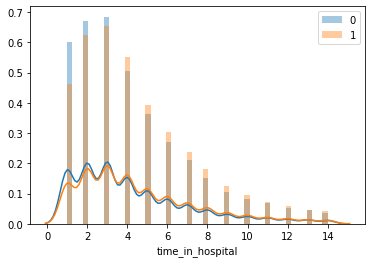

In [45]:
sns.distplot(readmitted_0["time_in_hospital"])
sns.distplot(readmitted_1["time_in_hospital"])
plt.legend([0,1])
plt.show()

In [46]:
ttest_ind(readmitted_0["time_in_hospital"],readmitted_1["time_in_hospital"])

Ttest_indResult(statistic=-16.159318138475864, pvalue=1.1562722637347654e-58)

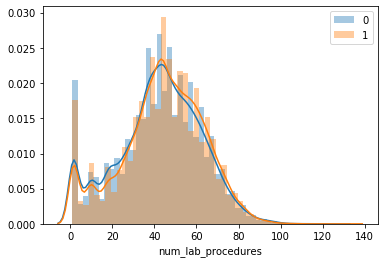

In [47]:
sns.distplot(readmitted_0["num_lab_procedures"])
sns.distplot(readmitted_1["num_lab_procedures"])
plt.legend([0,1])
plt.show()

In [48]:
ttest_ind(readmitted_0["num_lab_procedures"],readmitted_1["num_lab_procedures"])

Ttest_indResult(statistic=-12.446548805752114, pvalue=1.5503479061303804e-35)

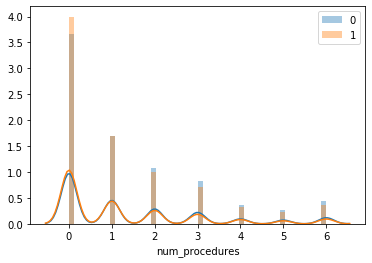

In [49]:
sns.distplot(readmitted_0["num_procedures"])
sns.distplot(readmitted_1["num_procedures"])
plt.legend([0,1])
plt.show()

In [50]:
ttest_ind(readmitted_0["num_procedures"],readmitted_1["num_procedures"])

Ttest_indResult(statistic=14.533105206292145, pvalue=8.35196667238723e-48)

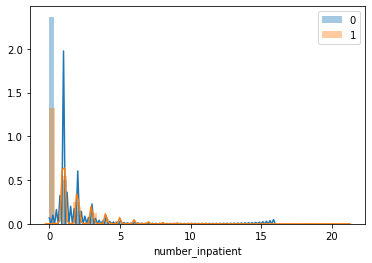

In [51]:
sns.distplot(readmitted_0["number_inpatient"])
sns.distplot(readmitted_1["number_inpatient"])
plt.legend([0,1])
plt.show()

In [52]:
ttest_ind(readmitted_0["number_inpatient"],readmitted_1["number_inpatient"])

Ttest_indResult(statistic=-70.69471257742059, pvalue=0.0)

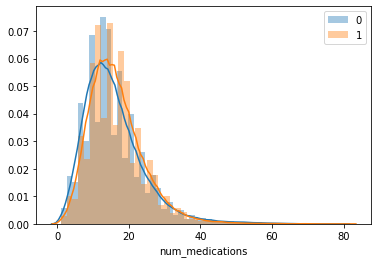

In [53]:
sns.distplot(readmitted_0["num_medications"])
sns.distplot(readmitted_1["num_medications"])
plt.legend([0,1])
plt.show()

In [54]:
ttest_ind(readmitted_0["num_medications"],readmitted_1["num_medications"])

Ttest_indResult(statistic=-14.462619866592195, pvalue=2.326793388491218e-47)

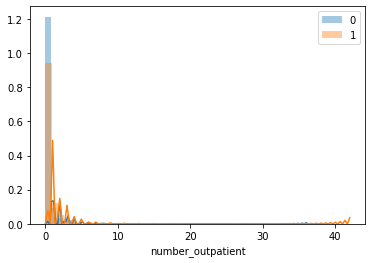

In [55]:
sns.distplot(readmitted_0["number_outpatient"])
sns.distplot(readmitted_1["number_outpatient"])
plt.legend([0,1])
plt.show()

In [56]:
ttest_ind(readmitted_0["number_outpatient"],readmitted_1["number_outpatient"])

Ttest_indResult(statistic=-26.097253227337223, pvalue=1.2272877400438544e-149)

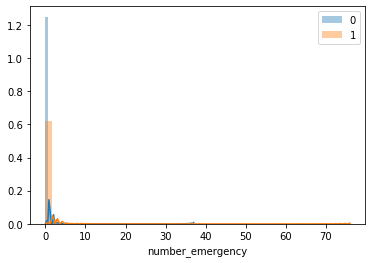

In [57]:
sns.distplot(readmitted_0["number_emergency"])
sns.distplot(readmitted_1["number_emergency"])
plt.legend([0,1])
plt.show()

In [58]:
ttest_ind(readmitted_0["number_emergency"],readmitted_1["number_emergency"])

Ttest_indResult(statistic=-32.903216542740886, pvalue=3.504275646574359e-236)

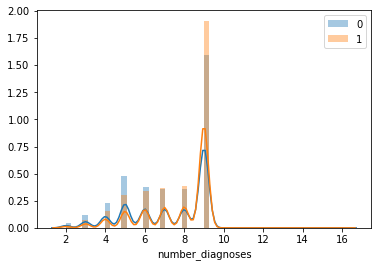

In [59]:
sns.distplot(readmitted_0["number_diagnoses"])
sns.distplot(readmitted_1["number_diagnoses"])
plt.legend([0,1])
plt.show()

In [60]:
ttest_ind(readmitted_0["number_diagnoses"],readmitted_1["number_diagnoses"])

Ttest_indResult(statistic=-35.35393002177477, pvalue=4.006629986728069e-272)

In [61]:
df1= pd.get_dummies(df,columns=['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3'],drop_first=True)

In [62]:
df1.head()

,encounter_id,patient_nbr,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,race_2.0,race_3.0,race_4.0,race_5.0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,age_90,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,diag_1_9.0,diag_1_10.0,diag_1_11.0,diag_1_12.0,diag_1_13.0,diag_1_14.0,diag_1_16.0,diag_1_17.0,diag_1_18.0,diag_1_19.0,diag_2_2.0,diag_2_3.0,diag_2_4.0,diag_2_5.0,diag_2_6.0,diag_2_7.0,diag_2_8.0,diag_2_9.0,diag_2_10.0,diag_2_11.0,diag_2_12.0,diag_2_13.0,diag_2_14.0,diag_2_16.0,diag_2_17.0,diag_2_18.0,diag_2_19.0,diag_3_1.0,diag_3_2.0,diag_3_3.0,diag_3_4.0,diag_3_5.0,diag_3_6.0,diag_3_7.0,diag_3_8.0,diag_3_9.0,diag_3_10.0,diag_3_11.0,diag_3_12.0,diag_3_13.0,diag_3_14.0,diag_3_16.0,diag_3_17.0,diag_3_18.0,diag_3_19.0
1,149190,55629189,0.0,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,64410,86047875,0.0,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,1.0,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,16680,42519267,1.0,1,51,0,8,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,1.0,3,31,6,16,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
cols=num_col.columns
for i in cols:
    num_col[i]=(num_col[i]-num_col[i].min())/(num_col[i].max()-num_col[i].min())

C:\Users\sakth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
num_col.head()

,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,num_medications,number_outpatient,number_emergency,number_diagnoses
1,0.153846,0.442748,0.000000,0.000000,0.2125,0.000000,0.0,0.500000
2,0.076923,0.076336,0.833333,0.047619,0.1500,0.047619,0.0,0.285714
3,0.076923,0.328244,0.166667,0.000000,0.1875,0.000000,0.0,0.357143
4,0.000000,0.381679,0.000000,0.000000,0.0875,0.000000,0.0,0.214286
5,0.153846,0.229008,1.000000,0.000000,0.1875,0.000000,0.0,0.500000


In [65]:
cat_col_1 = pd.get_dummies(cat_col,columns=['race','age','admission_type_id', 'discharge_disposition_id', 
              'admission_source_id','diag_1', 'diag_2', 'diag_3'],drop_first=True)

In [66]:
d1=pd.concat([num_col,cat_col_1,odinal_col],join="outer",axis=1)
d1

,time_in_hospital,num_lab_procedures,num_procedures,number_inpatient,num_medications,number_outpatient,number_emergency,number_diagnoses,race_2.0,race_3.0,race_4.0,race_5.0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80,age_90,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,diag_1_2.0,diag_1_3.0,diag_1_4.0,diag_1_5.0,diag_1_6.0,diag_1_7.0,diag_1_8.0,diag_1_9.0,diag_1_10.0,diag_1_11.0,diag_1_12.0,diag_1_13.0,diag_1_14.0,diag_1_16.0,diag_1_17.0,diag_1_18.0,diag_1_19.0,diag_2_2.0,diag_2_3.0,diag_2_4.0,diag_2_5.0,diag_2_6.0,diag_2_7.0,diag_2_8.0,diag_2_9.0,diag_2_10.0,diag_2_11.0,diag_2_12.0,diag_2_13.0,diag_2_14.0,diag_2_16.0,diag_2_17.0,diag_2_18.0,diag_2_19.0,diag_3_1.0,diag_3_2.0,diag_3_3.0,diag_3_4.0,diag_3_5.0,diag_3_6.0,diag_3_7.0,diag_3_8.0,diag_3_9.0,diag_3_10.0,diag_3_11.0,diag_3_12.0,diag_3_13.0,diag_3_14.0,diag_3_16.0,diag_3_17.0,diag_3_18.0,diag_3_19.0,gender,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,0.153846,0.442748,0.000000,0.000000,0.2125,0.000000,0.0,0.500000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,1
2,0.076923,0.076336,0.833333,0.047619,0.1500,0.047619,0.0,0.285714,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.076923,0.328244,0.166667,0.000000,0.1875,0.000000,0.0,0.357143,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,0.000000,0.381679,0.000000,0.000000,0.0875,0.000000,0.0,0.214286,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
5,0.153846,0.229008,1.000000,0.000000,0.1875,0.000000,0.0,0.500000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.153846,0.381679,0.000000,0.000000,0.1875,0.000000,0.0,0.500000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
101762,0.307692,0.244275,0.500000,0.047619,0.2125,0.000000,0.0,0.500000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
1

In [67]:
x = d1.drop('readmitted',axis=1)
y = d1['readmitted']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True,solver='liblinear')

lr.fit(x_train,y_train)

y_train_prod = lr.predict_proba(x_train)[:,1] 

y_train_pred = lr.predict(x_train)

In [77]:
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)

    y_train_pred=algo.predict(Xtrain)
    y_train_prob=algo.predict_proba(Xtrain)[:,1]
    
    y_test_pred=algo.predict(Xtest)
    y_test_prob=algo.predict_proba(Xtest)[:,1]
    print(algo)
    print('\n'*1)
    print(' Accuracy score of train: ', accuracy_score(ytrain,y_train_pred))
    print(' Accuracy score of test: ', accuracy_score(ytest,y_test_pred))
    print('\n'*1)
    print(' Confusion Matrix of train: ')
    print(confusion_matrix(ytrain,y_train_pred))
    print('\n'*1)
    print(' Confusion Matrix of test: ')
    print(confusion_matrix(ytest,y_test_pred))
    print('\n'*1)
    print('classification_report of train')
    print(classification_report(ytrain,y_train_pred))
    print('\n'*1)
    print(' Auc of train: ', roc_auc_score(ytrain,y_train_prob))
    print(' Auc of test: ', roc_auc_score(ytest,y_test_prob))

In [78]:
lr = LogisticRegression(fit_intercept=True,solver='liblinear')
model_eval(lr,x_train,y_train,x_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


 Accuracy score of train:  0.6279184455622719
 Accuracy score of test:  0.6306341848308512


 Confusion Matrix of train: 
[[29094  8943]
 [17464 15470]]


 Confusion Matrix of test: 
[[12616  3945]
 [ 7290  6566]]


classification_report of train
              precision    recall  f1-score   support

           0       0.62      0.76      0.69     38037
           1       0.63      0.47      0.54     32934

    accuracy                           0.63     70971
   macro avg       0.63      0.62      0.61     70971
weighted avg       0.63      0.63      0.62     70971



 Auc of train:  0.6713798248358023
 Auc of test:  0.671159265650692


In [79]:
rfc = RandomForestClassifier()
model_eval(rfc,x_train,y_train,x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


 Accuracy score of train:  1.0
 Accuracy score of test:  0.6313245882236908


 Confusion Matrix of train: 
[[38037     0]
 [    0 32934]]


 Confusion Matrix of test: 
[[12002  4559]
 [ 6655  7201]]


classification_report of train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38037
           1       1.00      1.00      1.00     32934

    accuracy                           1.00     70971
 

In [80]:
params = {
    'n_estimators' : sp_randint(5,150),
    'max_depth': sp_randint(2,10),
    'max_features' : sp_randint(1,15),
    'min_samples_split' : sp_randint(2,50),
    'min_samples_leaf' : sp_randint(1,50),
    'criterion' : ['gini','entropy']}

rsearch_rf = RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,n_jobs=-1,cv=3,scoring='roc_auc',random_state=1)
rsearch_rf.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [81]:
rsearch_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 14,
 'min_samples_leaf': 16,
 'min_samples_split': 26,
 'n_estimators': 142}

In [82]:
rfc = RandomForestClassifier(**rsearch_rf.best_params_)
model_eval(rfc,x_train,y_train,x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=26,
                       min_weight_fraction_leaf=0.0, n_estimators=142,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


 Accuracy score of train:  0.638796127995942
 Accuracy score of test:  0.6360259065654075


 Confusion Matrix of train: 
[[30065  7972]
 [17663 15271]]


 Confusion Matrix of test: 
[[12945  3616]
 [ 7455  6401]]


classification_report of train
              precision    recall  f1-score   support

           0       0.63      0.79      0.70     38037
           1       0.66      0.46      0.54     32934

    accuracy                           0.64